# In this section we will be talking about classification problems
1. what types of classification problems do we have ?
* Binary classification problems
* Multi-class classification problems

* Binary classification ex: classification of dogs and cats images
* Multi-class classification ex : classification of multiple animals classes

### Later through this Part we will tackle another type of classification problems -> multi-label classification

In [4]:
import sklearn

In [5]:
from sklearn.datasets import make_circles

n_samples = 1000

X , y = make_circles(n_samples,noise=0.05,random_state=42)

In [6]:
len(X) , len(y)

(1000, 1000)

In [7]:
X[:5] , y[:5]

(array([[ 0.74220688,  0.24668576],
        [-0.7340323 ,  0.16869164],
        [-0.82985872,  0.22195899],
        [-0.42913559,  0.67223019],
        [ 0.44560223, -0.89493556]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [8]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2" : X[:,1],
                        "label": y})

In [9]:
circles.head(10)

,X1,X2,label
0,0.742207,0.246686,1
1,-0.734032,0.168692,1
2,-0.829859,0.221959,1
3,-0.429136,0.672230,1
4,0.445602,-0.894936,0
5,-0.469885,0.708037,1
6,-0.016045,0.805623,1
7,0.759623,0.159526,1
8,-0.175692,-0.799837,1
9,-0.110616,1.042207,0


In [10]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

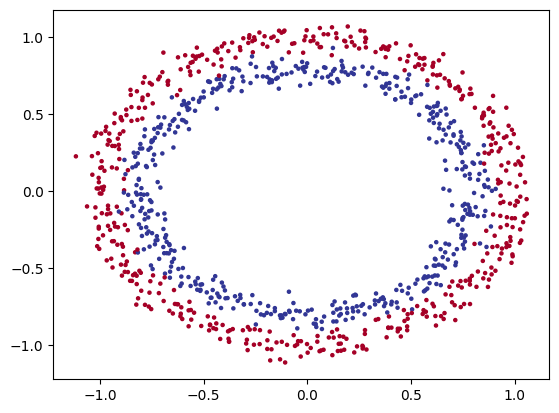

In [11]:
# visualisation
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],s=5,c=y,cmap=plt.cm.RdYlBu)

In [12]:
X.shape , y.shape

((1000, 2), (1000,))

In [13]:
# lets turn out data into tensors
import torch
print(torch.__version__)

type(X) , X.dtype

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

2.3.0+cu118


In [14]:
type(X) , X.dtype

(torch.Tensor, torch.float32)

In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [16]:
len(X_train) , len(y_train) , len(X_test) , len(y_test)

(800, 800, 200, 200)

In [17]:
# building the model

import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [18]:
# lets build the model we will construct it with two linear layers

class CircleModelV0(nn.Module):
    def __init__(self):
        super(CircleModelV0,self).__init__()

        self.layer1 = nn.Linear(2,5)
        self.layer2 = nn.Linear(5,1)


    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.layer2(self.layer1(x))
    

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
# Sequential Method

model_0 = nn.Sequential(
    nn.Linear(2,5),
    nn.Linear(5,1),
    ).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
"""
X_test -> y_test
"""

untrained_preds = model_0(X_test.to(device))

print(f"this is the shape of the untrained models predictions : {untrained_preds.shape}")
print(f"this is the real targets shape : {y_test.shape}")

this is the shape of the untrained models predictions : torch.Size([200, 1])
this is the real targets shape : torch.Size([200])


In [21]:
print(f"this is the untrained model predictions : {untrained_preds[:5]}") 
# if we use torch.round we would get something similar to the real targets
print(f"this is the real targets : {y_test[:5]} ")

this is the untrained model predictions : tensor([[0.2045],
        [0.1507],
        [0.2313],
        [0.1951],
        [0.0733]], device='cuda:0', grad_fn=<SliceBackward0>)
this is the real targets : tensor([1., 0., 1., 0., 1.]) 


## Always Remeber your workflow
![Alt text](../images/01_a_pytorch_workflow.png)

# Lets dig deeper into loss functions and optimizers
1. loss_functions -> https://pytorch.org/docs/stable/nn.html#loss-functions
2. optimizers -> https://pytorch.org/docs/stable/optim.html


In [22]:
"""
    so our problem is a classification problem,
    so our problem is a Binary classification problem,
    classification problem loss functions are :

    1. BCEloss() -> binary problems
    
    2. BCEWithLogitLoss() -> binary problems -> (sigmoid() , BCEloss()) -> we choose this because its numerically stable
        if we look inside we will find something like this -> nn.Sequential(nn.Sigmoid(),nn.BCELoss())

    3. CategoricalCrossEntropy() -> multi class classification

"""

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.01)


In [23]:
random_tensor = torch.tensor([-100,-5,-1,-0.5,0,0.5,1,5,100])
sigmoid_output = torch.sigmoid(random_tensor)
sigmoid_output

tensor([0.0000, 0.0067, 0.2689, 0.3775, 0.5000, 0.6225, 0.7311, 0.9933, 1.0000])

In [24]:
untrained_preds[:5]

tensor([[0.2045],
        [0.1507],
        [0.2313],
        [0.1951],
        [0.0733]], device='cuda:0', grad_fn=<SliceBackward0>)

In [25]:
sigmoid_output_2 = torch.sigmoid(untrained_preds[:5])
sigmoid_output_2

tensor([[0.5510],
        [0.5376],
        [0.5576],
        [0.5486],
        [0.5183]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [26]:
output_after_sigmoid = torch.round(sigmoid_output_2)
output_after_sigmoid

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0', grad_fn=<RoundBackward0>)

In [27]:
"""
tensor = [1,1,1,1,1] -> this is the output of the model
ground truth tensor = [1,0,1,1,0]

acc = 2/5 -> 60 % acc
"""

'\ntensor = [1,1,1,1,1] -> this is the output of the model\nground truth tensor = [1,0,1,1,0]\n\nacc = 2/5 -> 60 % acc\n'

In [28]:
def accuracy_function(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

In [29]:
x_p = torch.tensor([1,1,1,1,1])
x_t = torch.tensor([1,0,1,1,0])

accuracy_function(y_true=x_t,y_pred=x_p)

60.0

## So to sum this up we have a few steps to consider
1. logits -> preds prob -> round preds labels
2. binary classification we use sigmoid 
3. multi class classification we use softmax 

# Let's Construct a training loop

Steps
1. Forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward()
5. optimizer.step()

In [30]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# put the data to the target device -> "cuda"
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

# Lets start building training loop and evaluation loop
for epoch in range(epochs):
    ## training 
    model_0.train()

    ## 1. Forward pass
    """the raw output of my model is called logits """
    y_logits = model_0(X_train).squeeze()
    
    y_pred = torch.round(torch.sigmoid(y_logits)) # from logits -> pred prob -> pred class labels

    ## 2. calculate the loss
    """BCEwithLogitloss()"""
    loss = loss_fn(y_logits,y_train)

    acc = accuracy_function(y_true=y_train,y_pred=y_pred) 

    ## 3. optimizer zer grad
    optimizer.zero_grad()

    ## 4. loss backward (back prop)
    loss.backward()

    ## 5. optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. forward pass
        
        test_logits = model_0(X_test).squeeze()
        
        test_pred = torch.round(torch.sigmoid(test_logits)) # from logits -> pred prob -> pred class labels

        # 2. calculate the loss
        
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_function(y_true=y_test,y_pred=test_pred) 
    
    # logging .. print out what's happeing
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss:.5f} | Train Accuracy : {acc:.2f} | Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}")

Epoch : 0 | Loss : 0.69685 | Train Accuracy : 52.12 | Test Loss : 0.69556 | Test Accuracy : 51.00
Epoch : 10 | Loss : 0.69652 | Train Accuracy : 54.12 | Test Loss : 0.69525 | Test Accuracy : 52.00
Epoch : 20 | Loss : 0.69623 | Train Accuracy : 56.00 | Test Loss : 0.69498 | Test Accuracy : 53.00
Epoch : 30 | Loss : 0.69596 | Train Accuracy : 56.88 | Test Loss : 0.69473 | Test Accuracy : 55.00
Epoch : 40 | Loss : 0.69573 | Train Accuracy : 57.25 | Test Loss : 0.69451 | Test Accuracy : 55.50
Epoch : 50 | Loss : 0.69552 | Train Accuracy : 57.88 | Test Loss : 0.69431 | Test Accuracy : 58.00
Epoch : 60 | Loss : 0.69533 | Train Accuracy : 57.63 | Test Loss : 0.69414 | Test Accuracy : 59.00
Epoch : 70 | Loss : 0.69516 | Train Accuracy : 56.50 | Test Loss : 0.69399 | Test Accuracy : 56.50
Epoch : 80 | Loss : 0.69501 | Train Accuracy : 56.50 | Test Loss : 0.69385 | Test Accuracy : 56.00
Epoch : 90 | Loss : 0.69487 | Train Accuracy : 54.87 | Test Loss : 0.69373 | Test Accuracy : 54.00


In [31]:
import requests
from pathlib import Path

# create utils direcory
utils_dire = Path("utils")
utils_dire.mkdir(parents=True,exist_ok=True)

# download the helper function script from github
if (utils_dire / "helper_functions.py").is_file():
    print("helper funtion already exists skipping downlaoding")
else:
    print("Downloading helper functions.py")
    request = requests.get("https://raw.githubusercontent.com/Amr-Abdellatif/learn-deep-learning-using-pytorch/main/helper_functions.py")
    with open(utils_dire / "helper_functions.py" ,"wb") as f:
        f.write(request.content)

# https://raw.githubusercontent.com/Amr-Abdellatif/learn-deep-learning-using-pytorch/main/helper_functions.py

helper funtion already exists skipping downlaoding


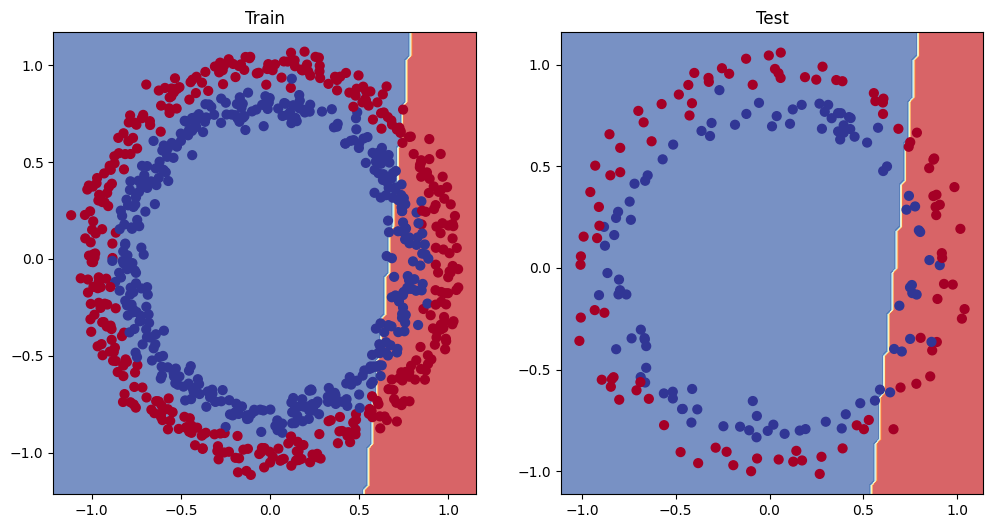

In [32]:
from utils.helper_functions import plot_decision_boundary , plot_predictions

# plot decision boundaries for training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


In [33]:
# lets build the model we will construct it with three linear layers
"""lets check if adding more linear layers to the model 
    will make the model more robust"""

class CircleModelV1(nn.Module):
    def __init__(self):
        super(CircleModelV1,self).__init__()

        self.layer1 = nn.Linear(2,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,1)


    def forward(self,x:torch.Tensor) -> torch.Tensor:
        return self.layer3(self.layer2(self.layer1(x)))
    

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [34]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 100

# put the data to the target device -> "cuda"
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

# Lets start building training loop and evaluation loop
for epoch in range(epochs):
    ## training 
    model_1.train()

    ## 1. Forward pass
    """the raw output of my model is called logits """
    y_logits = model_1(X_train).squeeze()
    
    y_pred = torch.round(torch.sigmoid(y_logits)) # from logits -> pred prob -> pred class labels

    ## 2. calculate the loss
    """BCEwithLogitloss()"""
    loss = loss_fn(y_logits,y_train)

    acc = accuracy_function(y_true=y_train,y_pred=y_pred) 

    ## 3. optimizer zer grad
    optimizer.zero_grad()

    ## 4. loss backward (back prop)
    loss.backward()

    ## 5. optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. forward pass
        
        test_logits = model_1(X_test).squeeze()
        
        test_pred = torch.round(torch.sigmoid(test_logits)) # from logits -> pred prob -> pred class labels

        # 2. calculate the loss
        
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_function(y_true=y_test,y_pred=test_pred) 
    
    # logging .. print out what's happeing
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss:.5f} | Train Accuracy : {acc:.2f} | Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}")

Epoch : 0 | Loss : 0.69393 | Train Accuracy : 51.00 | Test Loss : 0.69263 | Test Accuracy : 51.00
Epoch : 10 | Loss : 0.69390 | Train Accuracy : 50.88 | Test Loss : 0.69264 | Test Accuracy : 50.00
Epoch : 20 | Loss : 0.69387 | Train Accuracy : 50.62 | Test Loss : 0.69264 | Test Accuracy : 50.00
Epoch : 30 | Loss : 0.69384 | Train Accuracy : 50.50 | Test Loss : 0.69265 | Test Accuracy : 50.00
Epoch : 40 | Loss : 0.69381 | Train Accuracy : 50.75 | Test Loss : 0.69266 | Test Accuracy : 50.00
Epoch : 50 | Loss : 0.69379 | Train Accuracy : 50.50 | Test Loss : 0.69266 | Test Accuracy : 50.50
Epoch : 60 | Loss : 0.69376 | Train Accuracy : 50.25 | Test Loss : 0.69267 | Test Accuracy : 51.00
Epoch : 70 | Loss : 0.69374 | Train Accuracy : 50.12 | Test Loss : 0.69268 | Test Accuracy : 51.00
Epoch : 80 | Loss : 0.69371 | Train Accuracy : 50.25 | Test Loss : 0.69269 | Test Accuracy : 51.00
Epoch : 90 | Loss : 0.69369 | Train Accuracy : 50.25 | Test Loss : 0.69270 | Test Accuracy : 51.00


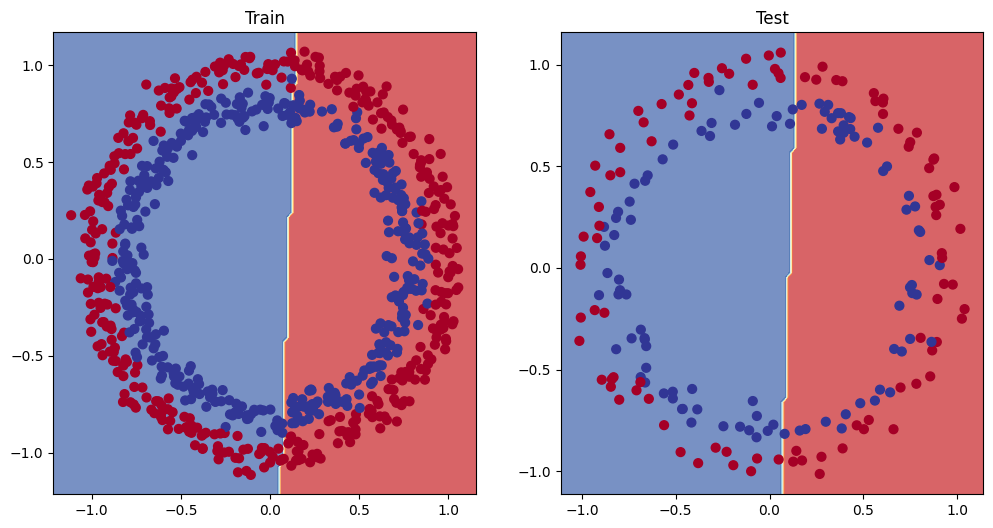

In [36]:
from utils.helper_functions import plot_decision_boundary , plot_predictions

# plot decision boundaries for training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)


In [37]:
"""we want to use activation functions to introduce non linearity"""

class CircleModelV2(nn.Module):
    def __init__(self):
        super(CircleModelV2,self).__init__()
        self.layer1 = nn.Linear(2,10)
        self.layer2 = nn.Linear(10,10)
        self.layer3 = nn.Linear(10,1)
        self.relu = nn.ReLU()

    def forward(self,x : torch.Tensor) -> torch.Tensor:
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_2 = CircleModelV2().to(device)
print(model_2)

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [38]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.01)

In [39]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# set the number of epochs
epochs = 200

# put the data to the target device -> "cuda"
X_train , y_train = X_train.to(device) , y_train.to(device)
X_test , y_test = X_test.to(device) , y_test.to(device)

# Lets start building training loop and evaluation loop
for epoch in range(epochs):
    ## training 
    model_2.train()

    ## 1. Forward pass
    """the raw output of my model is called logits """
    y_logits = model_2(X_train).squeeze()
    
    y_pred = torch.round(torch.sigmoid(y_logits)) # from logits -> pred prob -> pred class labels

    ## 2. calculate the loss
    """BCEwithLogitloss()"""
    loss = loss_fn(y_logits,y_train)

    acc = accuracy_function(y_true=y_train,y_pred=y_pred) 

    ## 3. optimizer zer grad
    optimizer.zero_grad()

    ## 4. loss backward (back prop)
    loss.backward()

    ## 5. optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
        # 1. forward pass
        
        test_logits = model_2(X_test).squeeze()
        
        test_pred = torch.round(torch.sigmoid(test_logits)) # from logits -> pred prob -> pred class labels

        # 2. calculate the loss
        
        test_loss = loss_fn(test_logits,y_test)
        
        test_acc = accuracy_function(y_true=y_test,y_pred=test_pred) 
    
    # logging .. print out what's happeing
    if epoch % 10 == 0:
        print(f"Epoch : {epoch} | Loss : {loss:.5f} | Train Accuracy : {acc:.2f} | Test Loss : {test_loss:.5f} | Test Accuracy : {test_acc:.2f}")

Epoch : 0 | Loss : 0.69295 | Train Accuracy : 50.00 | Test Loss : 0.69334 | Test Accuracy : 50.00
Epoch : 10 | Loss : 0.69290 | Train Accuracy : 50.00 | Test Loss : 0.69328 | Test Accuracy : 50.00
Epoch : 20 | Loss : 0.69285 | Train Accuracy : 50.00 | Test Loss : 0.69322 | Test Accuracy : 50.00
Epoch : 30 | Loss : 0.69280 | Train Accuracy : 50.00 | Test Loss : 0.69315 | Test Accuracy : 50.00
Epoch : 40 | Loss : 0.69275 | Train Accuracy : 50.00 | Test Loss : 0.69309 | Test Accuracy : 50.00
Epoch : 50 | Loss : 0.69270 | Train Accuracy : 50.12 | Test Loss : 0.69303 | Test Accuracy : 50.00
Epoch : 60 | Loss : 0.69266 | Train Accuracy : 50.50 | Test Loss : 0.69298 | Test Accuracy : 50.00
Epoch : 70 | Loss : 0.69262 | Train Accuracy : 50.50 | Test Loss : 0.69293 | Test Accuracy : 50.00
Epoch : 80 | Loss : 0.69258 | Train Accuracy : 50.88 | Test Loss : 0.69288 | Test Accuracy : 50.00
Epoch : 90 | Loss : 0.69254 | Train Accuracy : 51.25 | Test Loss : 0.69283 | Test Accuracy : 50.00
Epoch : 100

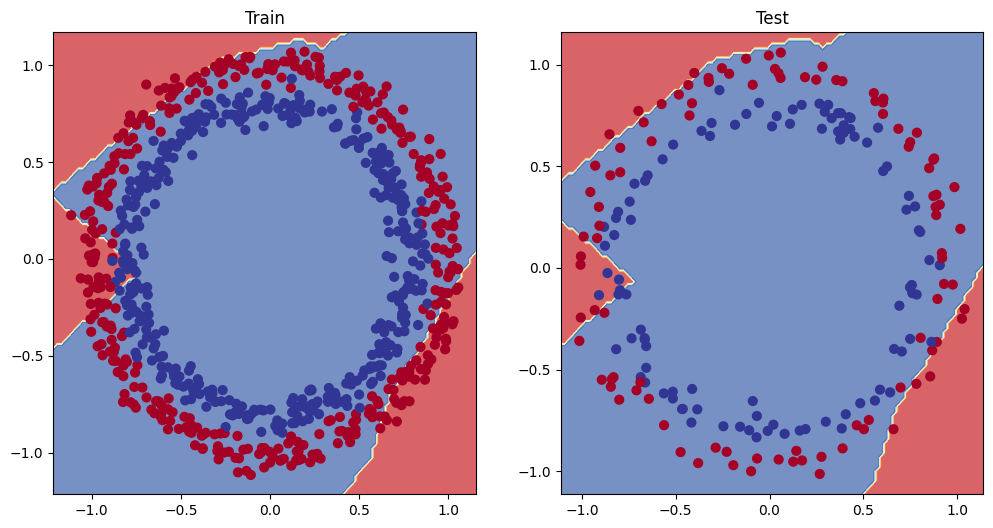

In [40]:
# plot decision boundaries for training and test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_2,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_2,X_test,y_test)


# Activation functions

In [43]:
# ReLu activation function

x = torch.linspace(-15,15,100)
x

tensor([-15.0000, -14.6970, -14.3939, -14.0909, -13.7879, -13.4848, -13.1818,
        -12.8788, -12.5758, -12.2727, -11.9697, -11.6667, -11.3636, -11.0606,
        -10.7576, -10.4545, -10.1515,  -9.8485,  -9.5455,  -9.2424,  -8.9394,
         -8.6364,  -8.3333,  -8.0303,  -7.7273,  -7.4242,  -7.1212,  -6.8182,
         -6.5152,  -6.2121,  -5.9091,  -5.6061,  -5.3030,  -5.0000,  -4.6970,
         -4.3939,  -4.0909,  -3.7879,  -3.4848,  -3.1818,  -2.8788,  -2.5758,
         -2.2727,  -1.9697,  -1.6667,  -1.3636,  -1.0606,  -0.7576,  -0.4545,
         -0.1515,   0.1515,   0.4545,   0.7576,   1.0606,   1.3636,   1.6667,
          1.9697,   2.2727,   2.5758,   2.8788,   3.1818,   3.4848,   3.7879,
          4.0909,   4.3939,   4.6970,   5.0000,   5.3030,   5.6061,   5.9091,
          6.2121,   6.5152,   6.8182,   7.1212,   7.4242,   7.7273,   8.0303,
          8.3333,   8.6364,   8.9394,   9.2424,   9.5455,   9.8485,  10.1515,
         10.4545,  10.7576,  11.0606,  11.3636,  11.6667,  11.96

In [44]:
def relu(x):
    return torch.max(torch.tensor(0),x)

y = relu(x)
y 

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.1515,  0.4545,  0.7576,  1.0606,  1.3636,  1.6667,
         1.9697,  2.2727,  2.5758,  2.8788,  3.1818,  3.4848,  3.7879,  4.0909,
         4.3939,  4.6970,  5.0000,  5.3030,  5.6061,  5.9091,  6.2121,  6.5152,
         6.8182,  7.1212,  7.4242,  7.7273,  8.0303,  8.3333,  8.6364,  8.9394,
         9.2424,  9.5455,  9.8485, 10.1515, 10.4545, 10.7576, 11.0606, 11.3636,
        11.6667, 11.9697, 12.2727, 12.5758, 12.8788, 13.1818, 13.4848, 13.7879,
        14.0909, 14.3939, 14.6970, 15.00

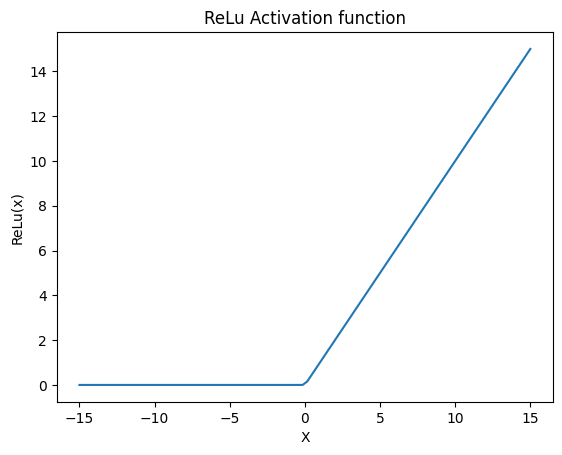

In [45]:
plt.plot(x.numpy(), y.numpy())
plt.title("ReLu Activation function")
plt.xlabel("X")
plt.ylabel("ReLu(x)")
plt.show()

In [62]:
# Tanh activation function

def tanh(x):
    return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

x = torch.linspace(-15,15,100)
y = tanh(x)
y

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -0.9999, -0.9998, -0.9997, -0.9994, -0.9990, -0.9981, -0.9966,
        -0.9937, -0.9885, -0.9790, -0.9618, -0.9311, -0.8772, -0.7859, -0.6396,
        -0.4256, -0.1504,  0.1504,  0.4256,  0.6396,  0.7859,  0.8772,  0.9311,
         0.9618,  0.9790,  0.9885,  0.9937,  0.9966,  0.9981,  0.9990,  0.9994,
         0.9997,  0.9998,  0.9999,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.00

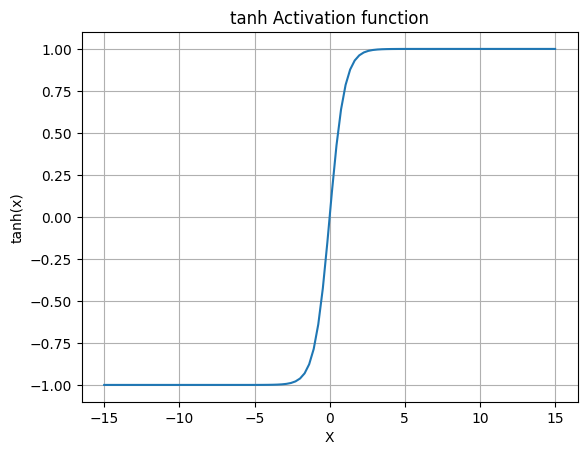

In [63]:
plt.plot(x.numpy(), y.numpy())
plt.title("tanh Activation function")
plt.xlabel("X")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.show()

In [64]:
# sigmoid activation function

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

x = torch.linspace(-15,15,100)
y = sigmoid(x)
y

tensor([3.0590e-07, 4.1418e-07, 5.6078e-07, 7.5927e-07, 1.0280e-06, 1.3919e-06,
        1.8846e-06, 2.5516e-06, 3.4547e-06, 4.6776e-06, 6.3332e-06, 8.5749e-06,
        1.1610e-05, 1.5719e-05, 2.1283e-05, 2.8816e-05, 3.9015e-05, 5.2824e-05,
        7.1521e-05, 9.6833e-05, 1.3110e-04, 1.7750e-04, 2.4031e-04, 3.2534e-04,
        4.4045e-04, 5.9626e-04, 8.0714e-04, 1.0925e-03, 1.4786e-03, 2.0010e-03,
        2.7073e-03, 3.6621e-03, 4.9518e-03, 6.6929e-03, 9.0404e-03, 1.2201e-02,
        1.6449e-02, 2.2142e-02, 2.9746e-02, 3.9856e-02, 5.3212e-02, 7.0715e-02,
        9.3407e-02, 1.2242e-01, 1.5887e-01, 2.0365e-01, 2.5719e-01, 3.1917e-01,
        3.8828e-01, 4.6219e-01, 5.3781e-01, 6.1172e-01, 6.8083e-01, 7.4281e-01,
        7.9635e-01, 8.4113e-01, 8.7758e-01, 9.0659e-01, 9.2928e-01, 9.4679e-01,
        9.6014e-01, 9.7025e-01, 9.7786e-01, 9.8355e-01, 9.8780e-01, 9.9096e-01,
        9.9331e-01, 9.9505e-01, 9.9634e-01, 9.9729e-01, 9.9800e-01, 9.9852e-01,
        9.9891e-01, 9.9919e-01, 9.9940e-

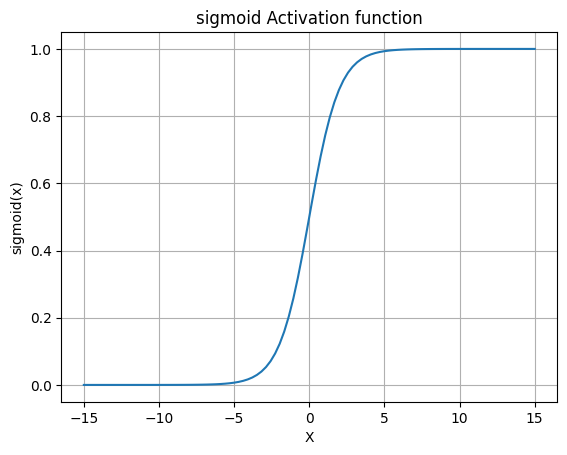

In [65]:
plt.plot(x.numpy(), y.numpy())
plt.title("sigmoid Activation function")
plt.xlabel("X")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()